<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [30]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [45]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [32]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [33]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [34]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


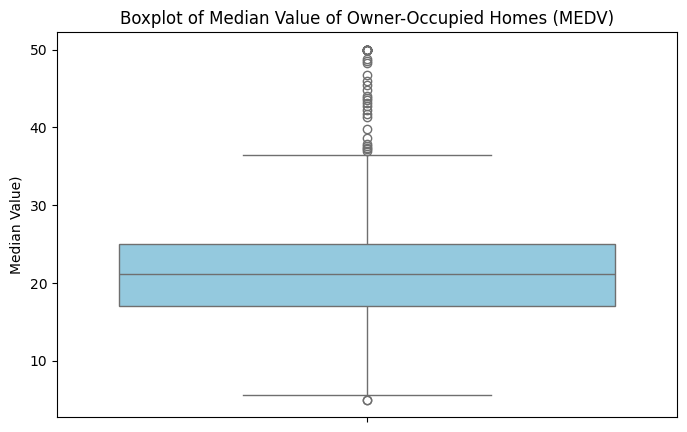

In [35]:
# 1. Boxplot for Median value of owner-occupied homes (MEDV)
pyplot.figure(figsize=(8, 5))
sns.boxplot(y=boston_df["MEDV"], color="skyblue")
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value)")
pyplot.show()

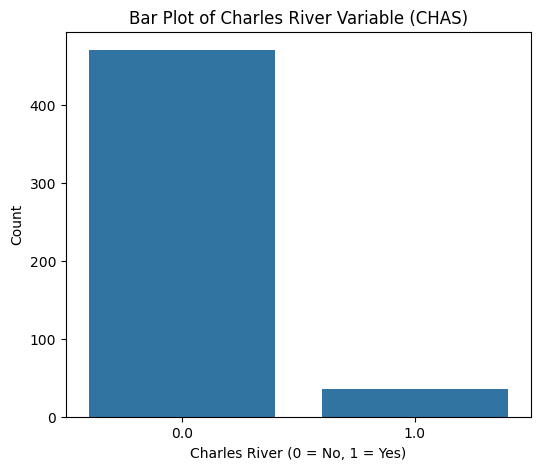

In [36]:
pyplot.figure(figsize=(6,5))
sns.countplot(x=boston_df["CHAS"])
pyplot.title("Bar Plot of Charles River Variable (CHAS)")
pyplot.xlabel("Charles River (0 = No, 1 = Yes)")
pyplot.ylabel("Count")
pyplot.show()

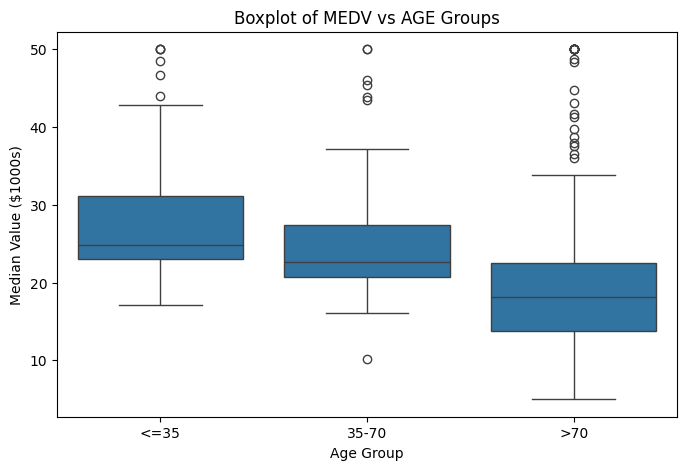

In [37]:
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=[0, 35, 70, 100], 
                                  labels=["<=35", "35-70", ">70"])
pyplot.figure(figsize=(8, 5))
sns.boxplot(x=boston_df["AGE_GROUP"], y=boston_df["MEDV"])
pyplot.title("Boxplot of MEDV vs AGE Groups")
pyplot.xlabel("Age Group")
pyplot.ylabel("Median Value ($1000s)")
pyplot.show()

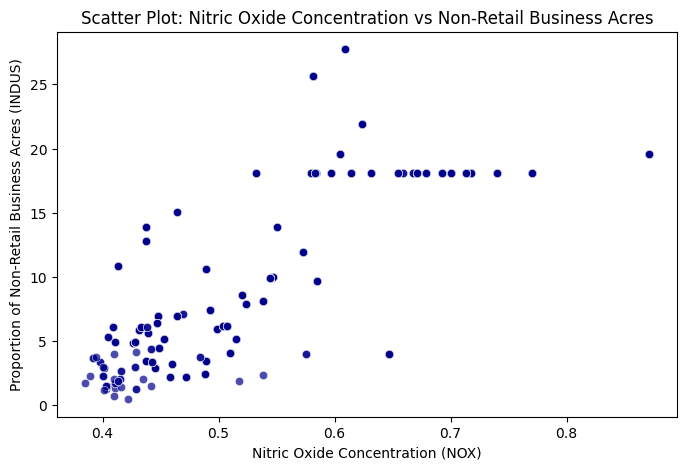

In [38]:
# 4. Scatter plot for Nitric Oxide (NOX) vs Non-Retail Business (INDUS)
pyplot.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"], alpha=0.7, color="darkblue")
pyplot.title("Scatter Plot: Nitric Oxide Concentration vs Non-Retail Business Acres")
pyplot.xlabel("Nitric Oxide Concentration (NOX)")
pyplot.ylabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.show()

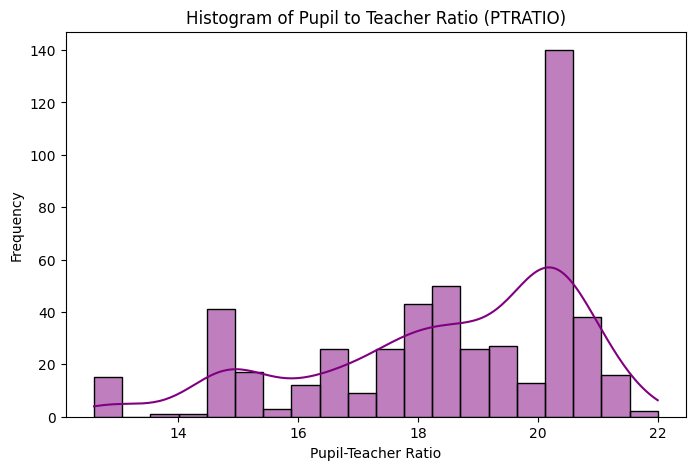

In [39]:
# 5. Histogram for Pupil to Teacher Ratio (PTRATIO)
pyplot.figure(figsize=(8, 5))
sns.histplot(boston_df["PTRATIO"], bins=20, kde=True, color="purple")
pyplot.title("Histogram of Pupil to Teacher Ratio (PTRATIO)")
pyplot.xlabel("Pupil-Teacher Ratio")
pyplot.ylabel("Frequency")
pyplot.show()


In [46]:
# 6. T-test: Is there a difference in MEDV between CHAS (Charles River) groups?
group1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]
group0 = boston_df[boston_df["CHAS"] == 0]["MEDV"]
t_stat, p_value = stats.ttest_ind(group1, group0)
print(f"T-test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in house values between CHAS groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in house values.")


T-test Results: t-statistic = 3.996, p-value = 0.000
Reject the null hypothesis: There is a significant difference in house values between CHAS groups.


In [50]:
# 7. ANOVA: Does AGE group impact MEDV?
model = ols("MEDV ~ C(AGE_GROUP)", data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Results:\n", anova_table)
if anova_table["PR(>F)"].iloc[0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV across AGE groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV across AGE groups.")


ANOVA Results:
                     sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in MEDV across AGE groups.


In [53]:
# 8. Pearson Correlation: Is NOX related to INDUS?
correlation, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print(f"Pearson Correlation: r = {correlation:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: NOX and INDUS are significantly correlated.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Pearson Correlation: r = 0.764, p-value = 0.000
Reject the null hypothesis: NOX and INDUS are significantly correlated.


In [54]:
# 9. Regression: Impact of DIS (Distance to employment centers) on MEDV
X = sm.add_constant(boston_df["DIS"])  # Adding constant term for regression
y = boston_df["MEDV"]
model = sm.OLS(y, X).fit()
print("Regression Results:\n", model.summary())
if model.pvalues.iloc[1] < 0.05:
    print("Reject the null hypothesis: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: DIS does not significantly impact MEDV.")


Regression Results:
                             OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        17:18:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.81